# Module 2: Regression - Car Price Prediction Project

In [3]:
# imports
import pandas as pd
import numpy as np

## 2.2 Data Preparation

In this section we will prepare the data for the coming exploration and modelling.

In [4]:
data_file_path = "./data/carpricedata.csv"

In [5]:
df = pd.read_csv(data_file_path)

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Now we can see the data we can fix some of the header row inconsistencies, such as spaces in the column names and some being lower case and others beginning with upper case.

In [7]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We can now do the same action for all of the values in the columns that have object type.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [11]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [12]:
df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [13]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [14]:
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [15]:
object_cols = list(df.dtypes[df.dtypes == 'object'].index)

In [16]:
for col in object_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [17]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Exploratory Data Analysis

In this section we will explore the data to get a better idea of what fields we have available, how the data is distributed and get a feel for relationships that are in the data.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [19]:
for col in df.columns:
    print(f"Column Name: {col}")
    print(f"Number of Unique values: {df[col].nunique()}")
    print(df[col].unique()[:5]) # first 5
    print()


Column Name: make
Number of Unique values: 48
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

Column Name: model
Number of Unique values: 914
['1_series_m' '1_series' '100' '124_spider' '190-class']

Column Name: year
Number of Unique values: 28
[2011 2012 2013 1992 1993]

Column Name: engine_fuel_type
Number of Unique values: 10
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

Column Name: engine_hp
Number of Unique values: 356
[335. 300. 230. 320. 172.]

Column Name: engine_cylinders
Number of Unique values: 9
[ 6.  4.  5.  8. 12.]

Column Name: transmission_type
Number of Unique values: 5
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

Column Name: driven_wheels
Number of Unique values: 4
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']

Column Name: number_of_doors
Number of Unique values: 3
[ 2.  4.  3. nan]

Column Name: market_category
Number of Unique val

### Distribution of the target Variable, MSRP

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
from pypalettes import load_cmap
cmap = load_cmap("X84")
palette = cmap.colors
hist_uni_color = cmap(0.2)

<Axes: xlabel='msrp', ylabel='Count'>

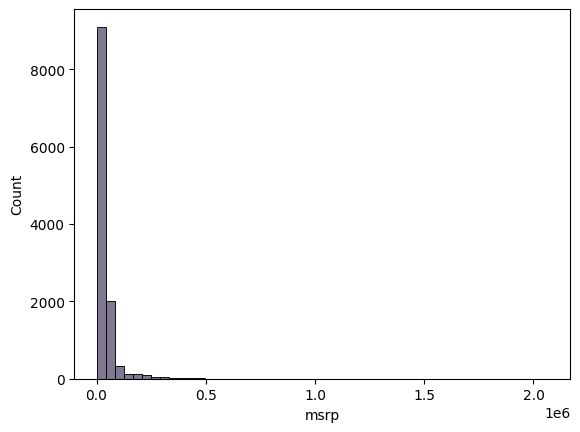

In [22]:
sns.histplot(df.msrp, bins=50, color=hist_uni_color, alpha=0.6)

<Axes: xlabel='msrp', ylabel='Count'>

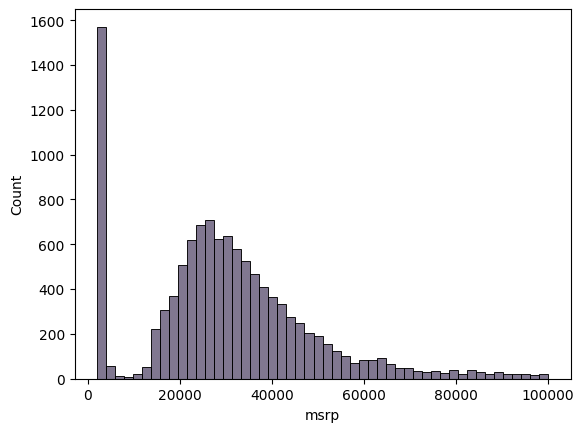

In [23]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50, color=hist_uni_color, alpha=0.6)

We can see evidence of longtail distribution from our visualisations. This is typical in pricing data, but not ideal when trying to use machine learning for predicting prices as the data is skewed to the cheaper end. One of the ways we can do this is by applying logarithimc scaling to it using 

In [24]:
logprice = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

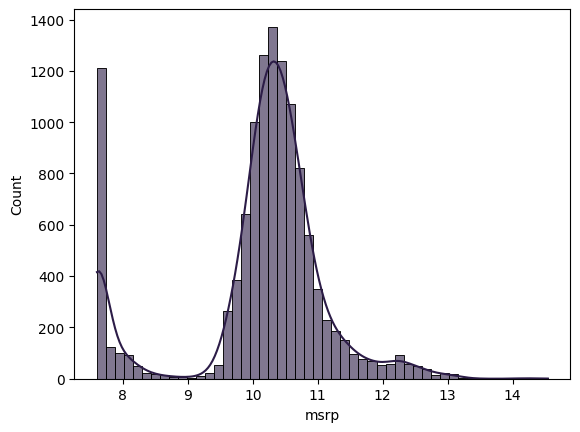

In [25]:
kde_color = cmap(0.8)
sns.histplot(logprice, bins=50, color=hist_uni_color, alpha=0.6,
             kde=True, line_kws={"color": kde_color})

Now the distribution more resembles a normal distribution, which will perform better with machine learning methods.

### Missing Values

Now we need to decide how to deal with missing values.

In [26]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

We have missing values in 5 columns: 
- engine_fuel_type
- engine_hp
- engine_cylinders
- number_of_doors
- market_category

There are a lot of missing values for market_category.

## 2.4 Setting up the validation framework

In this section we make a decision on how we will split the dataset into training validation and test subsets.

In [27]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)

In [28]:
n, n_val + n_test + n_train

(11914, 11912)

If we split in this way we are left with 2 left over due to rounding, so we can have train as total minus the val and test amounts.

In [29]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [30]:
n, n_val + n_test + n_train

(11914, 11914)

In [31]:
n_val , n_test , n_train

(2382, 2382, 7150)

Now we can use iloc to split the dataset.

In [32]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val: n_val + n_test]
df_train = df.iloc[n_val + n_test:]

In [33]:
print(f"Validation Dataframe Shape: {df_val.shape}")
print(f"Test Dataframe Shape: {df_test.shape}")
print(f"Train Dataframe Shape: {df_train.shape}")

Validation Dataframe Shape: (2382, 16)
Test Dataframe Shape: (2382, 16)
Train Dataframe Shape: (7150, 16)


In [34]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4764,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,37800
4765,ford,flex,2017,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,43030
4766,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,40180
4767,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32730
4768,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,38230


We have a problem here though that the data seems to be in order. Why is this a problem? We need each subset of the data to be a reflection of the general nature of the population of cars. Otherwise our model will not perform well in the real world. Let's implement a shuffle.

In [35]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]


In [36]:
print(f"Train Dataframe Shape: {df_train.shape}")
print(f"Validation Dataframe Shape: {df_val.shape}")
print(f"Test Dataframe Shape: {df_test.shape}")

Train Dataframe Shape: (7150, 16)
Validation Dataframe Shape: (2382, 16)
Test Dataframe Shape: (2382, 16)


Question: Do we need a seed for reprodicbility? Answer: YES

In [37]:
index_of_df = np.arange(n)

In [38]:
np.random.seed(2)
np.random.shuffle(index_of_df)

In [39]:
index_of_df

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [40]:
df_train = df.iloc[index_of_df[:n_train]]
df_val = df.iloc[index_of_df[n_train:n_train + n_val]]
df_test = df.iloc[index_of_df[n_train + n_val:]]

In [41]:
df_train.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [42]:
print(f"Train Dataframe Shape: {df_train.shape}")
print(f"Validation Dataframe Shape: {df_val.shape}")
print(f"Test Dataframe Shape: {df_test.shape}")

Train Dataframe Shape: (7150, 16)
Validation Dataframe Shape: (2382, 16)
Test Dataframe Shape: (2382, 16)


Now we have shuffled the data, we can reset the index for all three datasets.

In [43]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [44]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


Now we can create the target variable arrays that we will need when model building, as well as feature only dataset, by dropping the msrp colum from the df train, val and test to create X data frames.

In [45]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [46]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [47]:
X_train = df_train.drop('msrp', axis=1)

In [48]:
X_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [49]:
X_val = df_val.drop('msrp', axis=1)
X_test = df_test.drop('msrp', axis=1)

In [50]:
X_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [51]:
X_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202


## 2.5 Linear Regression

Linear regression one of the foundational machine learning models that tries to estimate the line of best fit to represent the relationship between features and the target response.

In [52]:
w0 = 0
# w = [1, 1, 1]

In [53]:
def linear_regression(xi: np.array):
    n = len(xi)
    w = np.ones(n)
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred



In [54]:
xi = [453, 11, 86]

In [55]:
linear_regression(xi)

np.float64(550.0)

Lets now try this with some different weights.

In [56]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [57]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [58]:
xi = [453, 11, 86]

In [59]:
result = linear_regression(xi)

We have to find the exponent minus 1 of the result of the linear regression model to find the actual cost because we found log plus one of the prices previously

In [60]:
np.expm1(result)

np.float64(222347.2221101062)

## 2.6 Linear Regression: Vector Form

We can represent linear regression through vector form. When we consider just one car, we have a feature vector that holds the data from the attributes or characteristics of the car. We then multiply this vector by a vector of weights. The equation that represents linear regression is not only the sum of the features xi multiplied by the weights but also these must also be added to w0.

In [61]:
def dot(xi, w):
    n = len(xi)

    result = 0.0

    for j in range(n):
        result = result + xi[j] * w[j]
    
    return result

In [62]:
def linear_regression(xi: np.array):
    return w0 + dot(xi, w)

In [63]:
linear_regression(xi)

12.312000000000001

Now we have implemeted this we can go further by adding the w0 weight to the weight vector to simplify the implementation. To make sure this is equivalent to the previous implementation, we must also add 1 to the feature vector so that w0 remains the same value when multiplying the two vectors.

In [64]:
w_new = [w0] + w

In [65]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [66]:
def linear_regression(xi):
    xi_new = [1] + xi # This notation would not work with np.array type object.
    return dot(xi_new, w_new)

In [67]:
linear_regression(xi)

12.312

The previous examples only considered a single dataset that represented one car. We need to perform this for multiple cars at once. To do this we represent features within a matrix instead of a vector. The dot product can then be performed between that matrix and the weight vector, to get multiple predictions at once.

In [68]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [69]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1, x2, x3]
X = np.array(X)

In [70]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [71]:
def linear_regression(X: np.array):
    return X.dot(w_new)

In [72]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a Linear regression model

To this point we have used random numbers for weights in our model. In this stage we will use methods to find the best weights that will gave the closest approximation to the actual car prices in our dataset.

In [73]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   83],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [74]:
ones = np.ones(X.shape[0])

In [75]:
X = np.column_stack([ones, X])

In [76]:
XTX = X.T.dot(X)

In [77]:
XTX_inv = np.linalg.inv(XTX)

In [78]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [79]:
w_full = XTX_inv.dot(X.T).dot(y)

In [80]:
w_full

array([ 3.00092529e+04, -2.27839691e+01, -2.57690874e+02, -2.30322797e+00])

In [81]:
w0 = w_full[0]
w = w_full[1:]

In [82]:
w0, w

(np.float64(30009.252922766562),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

In [83]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [84]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]
 
X = np.array(X)

y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

train_linear_regression(X, y)

(np.float64(30009.252922766562),
 array([ -22.78396914, -257.69087426,   -2.30322797]))

## 2.8 Car price baseline model

Now we have been able to implement a training solution we can now create a baseline model for predicting car prices, based on the numerical features that we have in our dataset.

In [85]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [86]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [87]:
base_cols = ['engine_hp',
       'engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

df_train[base_cols]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [88]:
X_train = df_train[base_cols].values

In [89]:
df_train[base_cols].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [90]:
X_train = df_train[base_cols].fillna(0).values

In [91]:
w0, w = train_linear_regression(X_train, y_train)

In [92]:
y_pred = w0 + X_train.dot(w)

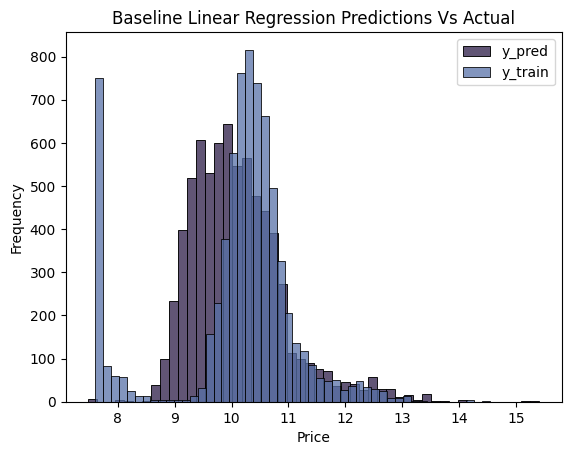

In [93]:
# Plot of results of predictions vs actual prices
sns.histplot(y_pred, bins=50, color=hist_uni_color, label='y_pred')
sns.histplot(y_train, bins=50, color=kde_color, label='y_train')
plt.title('Baseline Linear Regression Predictions Vs Actual')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Text(0, 0.5, 'Predicted Car Prices')

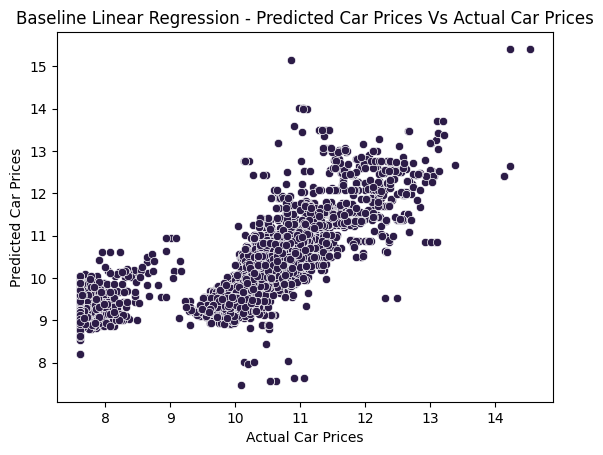

In [94]:
# Predictions vs actual 
sns.scatterplot(x=y_train, y=y_pred, color=hist_uni_color)
plt.title('Baseline Linear Regression - Predicted Car Prices Vs Actual Car Prices')
plt.xlabel('Actual Car Prices')
plt.ylabel('Predicted Car Prices')

## 2.9 Root Mean Squared Error

This is one of the methods we can use to evaluate regression models. This method takes the difference between actual and predicted values, and squares them. Then the average of all squared errors is calcuated. And then we find the root square of the final value.

In [103]:
def rmse(y, y_pred):
    sq_error = (y_pred - y)** 2
    mse = sq_error.mean()
    rmse = np.sqrt(mse)
    return rmse

In [104]:
result_error = rmse(y_train, y_pred)
result_error

np.float64(0.7554192603920132)

## 2.10 Validating the model


## 2.11 Feature Engineering

## 2.12 Categorical Variables

## 2.13 Regularisation

## 2.14 Tuning the model

## 2.15 Using the model